# Descenso por gradiente completo

El método de descenso por gradiente es una técnica de optimización utilizada para encontrar el mínimo de una función. Consiste en iterativamente ajustar los parámetros de la función en la dirección opuesta al gradiente de la función de pérdida, multiplicado por una tasa de aprendizaje. Esto permite que los parámetros converjan hacia los valores que minimizan la función de pérdida, lo que es crucial en el entrenamiento de modelos de aprendizaje automático como redes neuronales, donde se busca minimizar el error entre las predicciones del modelo y los valores reales.

En este notebook implementaremos el algoritmo completo de descenso por gradiente. Para validar que funciona al final lo probaremos en el entrenamiento de una red neuronal simple. Usaremos como conjunto de datos que esta incluído en el archivo data.csv. 

### Alumno: Rodrigo Gerardo Trejo Arriaga


In [13]:
# importamos los paquete necesarios
import numpy as np

# cargamos datos de ejemplo
from data_prep import features, targets, features_test, targets_test

n_records, n_features = features.shape
last_loss = None

# En este ejercicio por propósitos de analizar las salidas utilizaremos la misma semilla para los números aleatorios.
np.random.seed(42)

In [14]:
# Definimos algunas funciones necesarias
def sigmoid(x):
    """
    Sigmoide
    """
    return 1 / (1 + np.exp(-x))

## Inicialización de los pesos

En un principio no queremos tener todos los pesos en cero porque esto generaría en la salida una predicción nula. Por lo tanto, asignaremos los pesos iniciales de forma aleatoria y cercanos a cero. Otra recomendación es escalar los valores aleatorios es dependencia del número de entradas del nodo (n).

$$w = rand(1,\frac{1}{\sqrt{n}})$$



In [15]:
# Initialize weights. 
weights = np.random.normal(scale=1 / n_features**.5, size=n_features)


In [16]:
# Probemos la precisión de la red antes de entrenarla
tes_out = sigmoid(np.dot(features_test, weights))
predictions = tes_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

# La precisión debe ser mala seguramente.

Prediction accuracy: 0.475


## Hiperparámetros de la red

Los hiperpámetros de la red indican el números de veces que itera el método (épocas-epochs), la taza de aprendizaje (learning rate).


In [17]:
# número de épocas
epochs = 2
# tasa de aprendizaje
learning_rate = 0.5

## Descenso por gradiente completo.

El algoritmo de descenso por gradiente de forma iterativa cambia el valor de los pesos de tal forma que se disminuya el error. 

<img src="files/despg.png">

En la siguiete celda encontrarás la plantilla del algoritmo. Tu misión, si decides aceptarla, es completar el código faltante para que funcione el entrenamiento.

In [18]:
def entrenar_gradient_descent(features, targets, epochs, learning_rate):
    n_records, n_features = features.shape
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    last_loss = None
    History_loss = []
    
    for e in range(epochs):
        incremento_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Calcula la predicción de la red
            output = sigmoid(np.dot(x, weights))

            # Calcula el error
            error = y - output

            # Calcula el incremento
            incremento_w += error * x

        # Actualiza los pesos
        weights += learning_rate * incremento_w / n_records

        # Calcula el error en el conjunto de datos de entrenamiento para registro y visualización
        out = sigmoid(np.dot(features, weights))
        loss = np.mean((out - targets) ** 2)
        History_loss.append(loss)

        if e % (epochs / 10) == 0:
            if last_loss and last_loss < loss:
                print(f"Epoch {e}: Train loss: {loss}  WARNING - Loss Increasing")
            else:
                print(f"Epoch {e}: Train loss: {loss}")
            last_loss = loss

    return weights, History_loss

weights, History_loss = entrenar_gradient_descent(features, targets, epochs, learning_rate)

Epoch 0: Train loss: 0.24123227564038136


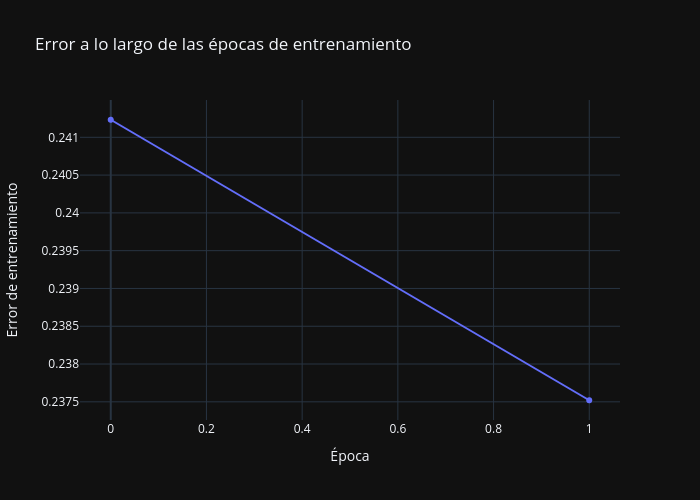

In [19]:
from IPython.display import Image, display

def graficar_error(history_loss):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(range(len(history_loss))), y=history_loss,
                             mode='lines+markers',
                             name='Train Loss'))
    fig.update_layout(title='Error a lo largo de las épocas de entrenamiento',
                      xaxis_title='Época',
                      yaxis_title='Error de entrenamiento',
                      template='plotly_dark')

    # Guardar la figura
    import plotly.io as pio
    file_path = "grafica.png"
    pio.write_image(fig, file_path)

    # Mostrar la imagen guardada
    display(Image(file_path))

    
graficar_error(History_loss)



## Evaluemos la exactitud de la red

Validar una red neuronal es crucial porque permite evaluar su rendimiento en datos independientes, verificando su capacidad para generalizar patrones aprendidos durante el entrenamiento. Mientras que el entrenamiento adapta los pesos de la red para minimizar el error en los datos de entrenamiento, la validación revela si el modelo puede hacer predicciones precisas en datos nuevos. Este proceso ayuda a detectar problemas de sobreajuste o subajuste, garantizando así que la red pueda desempeñarse de manera efectiva en situaciones del mundo real y proporcionar resultados confiables y útiles.

$$ Exactitud = \frac{\# aciertos}{\# predicciones} $$


In [20]:
def calcular_accuracy(features_test, targets_test, weights):
    tes_out = sigmoid(np.dot(features_test, weights))
    predictions = tes_out > 0.5
    accuracy = np.mean(predictions == targets_test)
    return accuracy

print(f"Accuracy: {calcular_accuracy(features_test, targets_test, weights)}")

Accuracy: 0.625


Que tan bien te fue en los resultados? Seguramente bien. Pero ¿qué pasará si incrementamos las épocas? O ¿qué es lo que pasará si cambiamos la tasa de aprendizaje? (La respuesta se anexa abajo)

Pruebas extra:

Epoch 0: Train loss: 0.28104822923653866
Epoch 1: Train loss: 0.2673718801512775
Epoch 2: Train loss: 0.2564474486762233
Epoch 3: Train loss: 0.24786102357644926
Epoch 4: Train loss: 0.24114520705910408
Epoch 5: Train loss: 0.23587185807822084
Epoch 6: Train loss: 0.23168823952934584
Epoch 7: Train loss: 0.22832071216812647
Epoch 8: Train loss: 0.22556421466148366
Epoch 9: Train loss: 0.22326791082106326


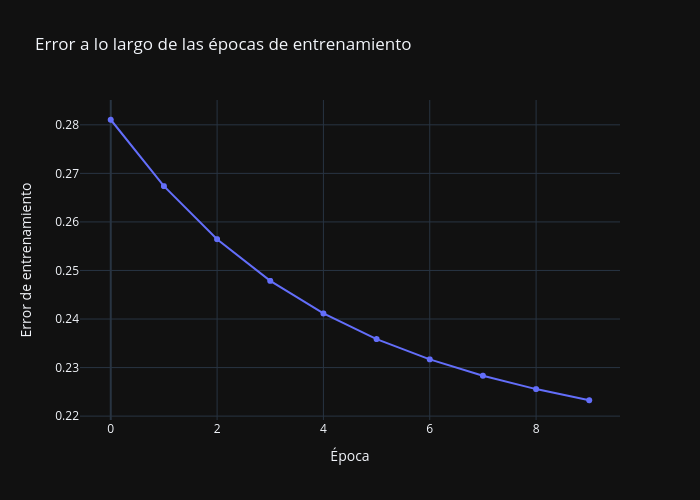

Accuracy: 0.7


In [21]:
weights, History_loss = entrenar_gradient_descent(features, targets, epochs=10, learning_rate=0.5)
graficar_error(History_loss)
print(f"Accuracy: {calcular_accuracy(features_test, targets_test, weights)}")

Epoch 0: Train loss: 0.2813085008617914
Epoch 10: Train loss: 0.21418743585374128
Epoch 20: Train loss: 0.20576722144827503
Epoch 30: Train loss: 0.20209900892222996


Epoch 40: Train loss: 0.20010576963016094
Epoch 50: Train loss: 0.19895924373852544
Epoch 60: Train loss: 0.1982706376396566
Epoch 70: Train loss: 0.1978415283797844
Epoch 80: Train loss: 0.1975657811700631
Epoch 90: Train loss: 0.19738403563142792


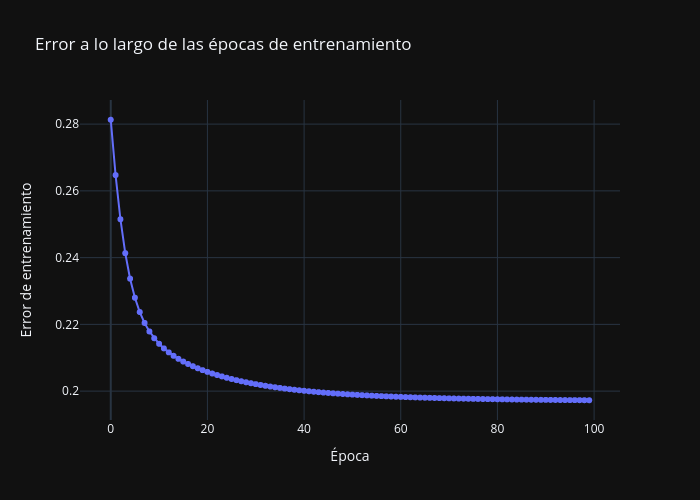

Accuracy: 0.725


In [22]:
weights, History_loss = entrenar_gradient_descent(features, targets, epochs=100, learning_rate=0.5)
graficar_error(History_loss)
print(f"Accuracy: {calcular_accuracy(features_test, targets_test, weights)}")

Epoch 0: Train loss: 0.25408474402135384
Epoch 10: Train loss: 0.24030702312557214
Epoch 20: Train loss: 0.2317053286950521
Epoch 30: Train loss: 0.22597996033170006
Epoch 40: Train loss: 0.22186748153556757
Epoch 50: Train loss: 0.21871047755553152
Epoch 60: Train loss: 0.21616343497711468
Epoch 70: Train loss: 0.21403728789420573
Epoch 80: Train loss: 0.21222240934408174
Epoch 90: Train loss: 0.21065070463764934


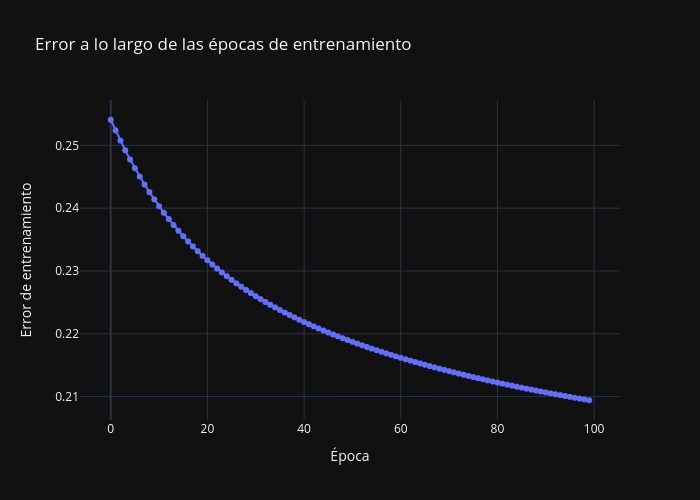

Accuracy: 0.8


In [23]:
weights, History_loss = entrenar_gradient_descent(features, targets, epochs=100, learning_rate=0.1)
graficar_error(History_loss)
print(f"Accuracy: {calcular_accuracy(features_test, targets_test, weights)}")

Epoch 0: Train loss: 0.25192750541499154
Epoch 12: Train loss: 0.24208782127313808


Epoch 24: Train loss: 0.2339543891687543
Epoch 36: Train loss: 0.22731977262863604
Epoch 48: Train loss: 0.2219563641266278
Epoch 60: Train loss: 0.21764154002710695
Epoch 72: Train loss: 0.21417418888916157
Epoch 84: Train loss: 0.21138255839108697
Epoch 96: Train loss: 0.2091256016764241
Epoch 108: Train loss: 0.20729049594735985


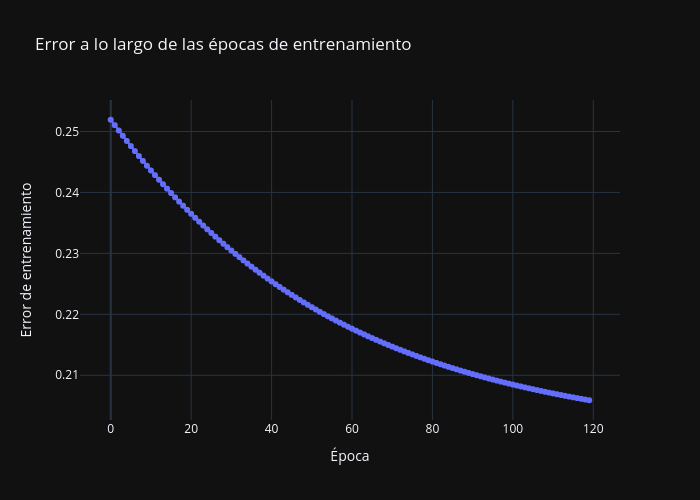

Accuracy: 0.7


In [24]:
weights, History_loss = entrenar_gradient_descent(features, targets, epochs=120, learning_rate=0.1)
graficar_error(History_loss)
print(f"Accuracy: {calcular_accuracy(features_test, targets_test, weights)}")

## Que tan bien te fue en los resultados? Seguramente bien. Pero ¿qué pasará si incrementamos las épocas? O ¿qué es lo que pasará si cambiamos la tasa de aprendizaje?

Tras realizar varios experimentos ajustando las épocas (`epochs`) y la tasa de aprendizaje (`learning_rate`), se observan tendencias claras en el comportamiento del error de entrenamiento y la precisión del modelo. 

### Tendencia del Error de Entrenamiento
El error de entrenamiento disminuye de manera consistente conforme aumentan las épocas, lo cual es una señal positiva de que el modelo está aprendiendo de los datos. Esto se ve claramente en las gráficas donde la curva del error desciende a medida que avanzamos a través de más épocas de entrenamiento.

### Impacto de Aumentar las Épocas
Aumentar el número de épocas ofrece al modelo más oportunidades para ajustar sus pesos y mejorar la precisión. Se debe, sin embargo, estar atento a los riesgos del sobreajuste, especialmente si la disminución en el error de entrenamiento no se acompaña de mejoras en la precisión de validación o prueba.

### Cambios en la Tasa de Aprendizaje
Modificar la tasa de aprendizaje altera cuánto cambian los pesos del modelo en cada actualización. Una tasa más alta puede acelerar el aprendizaje pero también correr el riesgo de oscilar alrededor del mínimo. Una tasa más baja garantiza pasos pequeños y más controlados, aunque a costa de mayor tiempo de entrenamiento. 

### Combinación Óptima
Interesantemente, la combinación de `epochs=100` y `learning_rate=0.1` ha resultado en una **precisión de 0.8**, destacando esta configuración como la más efectiva entre las probadas. Esto sugiere que un equilibrio entre el número de épocas y la tasa de aprendizaje puede resultar en un modelo más preciso y generalizable.



Escribe tus conclusiones:

## Conclusión

La experimentación con el número de épocas y la tasa de aprendizaje ha sido una práctica ilustrativa sobre la importancia en el ajuste hiperparámetros en el aprendizaje profundo. Es claro que no existe una única configuración de hiperparámetros que sea óptima para todos los conjuntos de datos o contextos; más bien, la elección de estos valores es un ejercicio de equilibrio y ajuste basado en el comportamiento del modelo durante la fase de entrenamiento.

La reducción del error de entrenamiento a lo largo de las épocas y la mejora de la precisión con una tasa de aprendizaje adecuada son indicativos de un modelo que está aprendiendo efectivamente. En particular, la configuración con `epochs=100` y `learning_rate=0.1` se destacó, alcanzando una precisión del 80%. Este resultado no sólo muestra el potencial del descenso por gradiente cuando se ajusta correctamente, sino también que un modelo relativamente simple es capaz de extraer patrones significativos de los datos.
